# Mini projet : Méthode de gradient à pas spectral


### Master : MHACS     $\quad \quad $   Module : Optimisation Avancée 

#### Cadre abstrait :

Le but de ce mini-projet est de programmer, valider et expérimenter la méthode de gradient avec pas spectral.
#### Question 1:
Les fonction qu'on va utiliser dans ce TP.

$J_1(u)= \langle u-f,u-f\rangle$

$J_2(u)=\langle u-g,u-g\rangle$

$J_5(u) =\frac{1}{2}\langle Au,u\rangle-\langle f,u \rangle+ \langle u,u \rangle$

$J_6(u) =\frac{1}{2}\langle Au,u\rangle-\langle f,u \rangle+ \langle w,u \rangle$

* Etudiant la convexité du fonction $J_1$:

la matrice Hessienne  de $J_1$, $H_1(u)=2 I_N$  qui est définit et possitive, donc $J_1$ est strictement convexe.
 
* Etudiant la convexité du fonction $J_2$:

de même pour  $J_2$, on a  $H_2(u)=2 I_N$ et donc $J_2$ est strictement convexe.
 
* Etudiant la convexité du fonction $J_5$:

la matrice Hessienne  de $J_5$, $H_1(u)=A+2 I_N$  qui est définit et possitive, donc $J_5$ est strictement convexe.
##### preuve :

soit $ X  \in \mathbb{R}^N$, On a $\langle X,(A+2I_N)X\rangle=\langle X,AX\rangle+2\langle X,X\rangle> 0$.

La convexité du fonction $J_6$

la matrice Hessienne  de $J_6$ s'exprime comme suite :

$H_6(u)=A+12M(u)$, avec
$M(u)= \begin{pmatrix}
        u_1^2  & \cdots & 0 \\ 
    \vdots & \ddots & \vdots \\ 
    0      & \cdots & u_N^2 
\end{pmatrix}$.

Puisque $H_6(u)$ est  la somme d'une matrice définit et positive et d'une matrice positive, alors $H_6(u)$ est définit et positive. Par suite $J_6$ est strictement convexe.

#### Question 2

La fonction de Rosenbrok:

$$
J_R(v) = \sum_{i=1}^{N-1}(v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i - 1)^2
$$
La fonction peut s'exprimer sous la forme :
$$
J_R(v) = \sum_{i=2}^{N}(v_i)^2 -2 \sum_{i=2}^{N} (v_i)(v_{i-1})^2+\sum_{i=1}^{N-1} (v_i)^2
$$
et donc pour un $v$ fixé, si on note par $G$ le gradient de $J_R(v)$ en $v$
on a 

* $G_1=4v_1^3-4v_2 v_1$,

* $G_i=2v_i -2v_{i-1}^2 +4v_i^3\; \forall i\in 2, ...,N-1$,  

* $G_N=2v_N-2v_{N-1}^2$
















In [1]:
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
def JG1(v):
    N = len(v)
    ones = np.ones(N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def JG2(v):
    N = len(v)
    gamma = np.arange(1,N+1)
    return [np.dot(v-gamma,v-gamma), 2*(v-gamma)]
def JG5(v):
    N=len(v)
    A=2*np.eye(N,N)-np.diag(np.ones(N-1),1)-np.diag(np.ones(N-1),-1)
    f=np.ones(N)
    u=A.dot(v)
    return 0.5*np.dot(u,v)-np.dot(f,v)+np.dot(v,v), A.dot(v)-f+2*v
def JG6(v):
    N=len(v)
    A=2*np.eye(N,N)-np.diag(np.ones(N-1),1)-np.diag(np.ones(N-1),-1)
    f=np.ones(N)
    u=A.dot(v)
    v2=v**2
    return 0.5*np.dot(u,v)-np.dot(f,v)+np.dot(v2,v2), A.dot(v)-f+4*v**3
def Res(v):
    N=len(v)
    ones = np.ones(N-1)
    a=v[1:N]
    b=v[0:N-1]
    v_prod=np.zeros(N)
    for i in range(N-1):
        v_prod[i]=v[i]*v[i+1]
    v1=np.zeros(N)
    v2=np.zeros(N)
    v3=np.zeros(N)
    v1[1:N]=a
    v2[1:N]=b**2
    v3[0:N-1]=b**3
    grad_res=4*v3-2*v2+2*v1-4*v_prod+2*(v-np.ones(N))
    
    
    return np.dot(a,a)-2*np.dot(a,b**2)+np.dot(b**2,b**2)+np.dot(b-ones,b-ones),grad_res

def f_test(v):
  return J1(v)

### Minimisation par gradient constant:

In [2]:

def gradient_fixe(u_0, eta, eps, Nmax):
    # u_0        : point initial
    # eta      : pas fixe
    # eps     : tolérance sur la norme du gradient
    # Nmax : nombre maximal d'iterations
    #f_test :la fonction qu'on veux minimiser, et leur Gradient f(v),Grad_f(v)=f_test(v)

    # création d'un tableau de stockage pour enregistrer l'évolution du cout
    cost_history = np.zeros(Nmax) 
     
    for k in range(0, Nmax):
        [J_u,Grad_J] = f_test(u_0)
        im_f[k] = J_u # on enregistre la valeur du cout à l'itération k dans im_f[k]

        if LA.norm(G) < eps:
          break

        u_0 = u_0 - eta * G # formule du gradient descent
         
    return u_0, k, im_f

### Shéma a pas spectral 
$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$
et 
$$
\rho^1_k = \dfrac{(s^{(k-1)} ,s^{(k-1)})}{(y^{(k-1)} ,s^{(k-1)})} ;
\qquad 
\rho^2_k = \dfrac{(s^{(k-1)} ,y^{(k-1)})}{(y^{(k-1)} ,y^{(k-1)})}
$$
Le schéma du gradient desente est donné par :
\begin{equation}
u^{(0)},\rho^{(0)} \textrm{ donné}; \quad u^{(k+1)} = u^{(k)} - \rho_k \nabla J(u^{(k)})
\end{equation}
et $u^{(1)}$ est calculé par $u^{(1)}=u^{(0)}- \rho_k \nabla J(u^{(0)})$

### Algorithme BB1:


In [3]:
 
def BB1_Grad_spect(u_0,pho_0,Nmax,JG1):
    # u_0        : point initial
    # eta      : pas initial
    # Nmax : nombre maximal d'iterations
    #JG1 :la fonction qu'on veux minimiser, et leur Gradient f(v),Grad_f(v)=f_test(v)
    N=len(u_0)
    Q=np.zeros((N,Nmax)) #  on enregistre le vecteur u à l'itération k dans Q[:,k]
    j1_0 ,GradJ_0 =JG1(u_0) #on calcule l'image et le gradient au point u_0
    u_1=u_0-pho_0*GradJ_0
    j1_1,GradJ_1=JG1(u_1)
    Q[:,0]=u_0
    Q[:,1]=u_1.copy()
    k=0
    history=np.zeros(Nmax) # on enregistre la valeur du cout à l'itération k dans history[k]
    history[0]=j1_0
    
    for i in range(1,Nmax-1):
       tol=1e-8 #condition sur le gradient
       k=k+1
       
       S=Q[:,i]-Q[:,i-1]
       j1_i,GradJ_i=JG1(Q[:,i])
    
       if LA.norm(GradJ_i,2)<tol :
           break

       j1_i1,GradJ_i1=JG1(Q[:,i-1])
       Y=GradJ_i-GradJ_i1
       pho=LA.norm(S)**2/np.dot(S,Y)
       Q[:,i+1]=Q[:,i]-pho*GradJ_i
       j1_i11,GradJ_i11=JG1(Q[:,i+1])
       history[i+1]=j1_i11
   
    return history[0:k-1],Q[:,k],k-1


### Test:
Ici on va éffectuer un test avec le schéma BB1
pour les deux cas test suivant: 
$$J_1(v) = \sum_{i=1}^{i=N}{(v_i - 1)^2}, \quad J_2(v) = \sum_{i=1}^{i=N}{(v_i - i)^2}$$
avec dimension N=10

### Pour la fonction J1



In [4]:
Nmax=100
u_0=np.zeros(10)
#u_0[0]=1
#u_0[1]=1.5
pho_0=0.1
hist,u_app,k1=BB1_Grad_spect(u_0,pho_0,Nmax,JG1)
print('La solution est atteint en ',k1, 'iterations')
print(u_app)



La solution est atteint en  1 iterations
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Pour la fonction J2

In [5]:
Nmax=100
u_0=np.zeros(10)
#u_0[0]=1
#u_0[1]=1.5
pho_0=0.1
hist,u_app,k2=BB1_Grad_spect(u_0,pho_0,Nmax,JG2)
print('La solution est atteint en ',k2, 'iterations')
print(u_app)

La solution est atteint en  1 iterations
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


### Algorithme BB2


In [6]:
def BB2_Grad_spect(u_0,pho_0,Nmax,JG1):
    tol=1e-10
    N=len(u_0)
    Q=np.zeros((N,Nmax))
    j1_0,GradJ_0=JG1(u_0)
    u_1=u_0-pho_0*GradJ_0
    j1_1,GradJ_1=JG1(u_1)
    Q[:,0]=u_0
    Q[:,1]=u_1.copy()
    history=np.zeros(Nmax)
    history[0]=j1_0
    history[1]=j1_1
    k=0
    for i in range(1,Nmax-1):
       
       S=Q[:,i]-Q[:,i-1]
       j1_i , GradJ_i=JG1(Q[:,i])
       j1_i1 , GradJ_i1 = JG1(Q[:,i-1])
       Y=GradJ_i - GradJ_i1
       norm=LA.norm(Y)    
       prod=np.dot(S,Y)
       pho= prod/norm**2
       Q[:,i+1]=Q[:,i] - pho*GradJ_i
       j1_i11,GradJ_i11=JG1(Q[:,i+1])
       history[i+1]=j1_i11
       k=k+1
       if LA.norm( GradJ_i)<tol:
           break
 
    
    
    return history[0:k-1],Q[:,k],k-1

### Minimisation de  la fonction J1 par le schéma BB2

In [7]:
Nmax=100
pho_0=0.1
u_0=np.zeros(10)
hist,u_app,k1=BB2_Grad_spect(u_0,pho_0,Nmax,JG1)
print('La solution est atteint en ',k1, 'iterations')
print(u_app)

La solution est atteint en  1 iterations
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Minimisation de  la fonction J2 par le schéma BB2

In [8]:
Nmax=100
pho_0=0.1
u_0=np.zeros(10)
hist,u_app,k1=BB2_Grad_spect(u_0,pho_0,Nmax,JG2)
print('La solution est atteint en',k1, 'iterations')
print(u_app)

La solution est atteint en 1 iterations
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


### Minimisation de  la fonction J5 par le schéma BB1

In [9]:

Nmax=100
N=10
u_0=np.zeros(N)
#u_0[0]=1
#u_0[1]=1.5
pho_0=0.1
hist,u_app,k1=BB1_Grad_spect(u_0,pho_0,Nmax,JG5)
print('La solution est atteint en',k1, 'iterations')
print(u_app)


La solution est atteint en 16 iterations
[0.36602452 0.46409807 0.49036778 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036778 0.46409807 0.36602452]


### Minimisation de  la fonction J5 par le schéma BB2

In [10]:
def resultatBB2_J5(N):
    Nmax=1000
    pho_0=0.1
    u_0=np.zeros(N)
    hist , u_app, k1=BB2_Grad_spect(u_0,pho_0,Nmax,JG5)
    return u_app,k1
N=10
u_app,k1=resultatBB2_J5(N)
print('La solution est atteint en',k1, 'iterations')
print(u_app)

La solution est atteint en 20 iterations
[0.36602452 0.46409807 0.49036778 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036778 0.46409807 0.36602452]


Comparaison avec la solution obtenu par la méthode Least square:
on a $\nabla J(u)=0 \Leftrightarrow (A+2I)u=f  $


### Resolution du système (A+2I)u=f par la méthode LS

In [11]:
N=10
f=np.ones((N,1))

A=2*np.eye(N,N)-np.diag(np.ones(N-1),1)-np.diag(np.ones(N-1),-1)

x,y,z,t=LA.lstsq(A+2*np.eye(N,N), f,rcond=-1)
print("La solution approché avec Last Square:\n",x.T)

La solution approché avec Last Square:
 [[0.36602452 0.46409807 0.49036778 0.49737303 0.49912434 0.49912434
  0.49737303 0.49036778 0.46409807 0.36602452]]


### Minimisation de  la fonction J6 par le schéma BB1

In [12]:
#Donner le dimension N =10,20,40,80
def resultatBB1_J6(N):
    Nmax=100
    pho_0=0.1
    u_0=np.zeros(N)
    hist , u_app, k1=BB1_Grad_spect(u_0,pho_0,Nmax,JG6)
    return u_app,k1
N=10
u_app,k1=resultatBB1_J6(N)
print('La solution est atteint en',k1, 'iterations')
print("La solution approché: \n",u_app)

La solution est atteint en 17 iterations
La solution approché: 
 [0.522072   0.61332607 0.62743683 0.62957732 0.62989402 0.62989402
 0.62957732 0.62743683 0.61332607 0.522072  ]


### Minimisation de  la fonction J6 par le schéma BB2

In [13]:

#donner le dimension N =10,20,40,80
def resultatBB2_J6(N):
    Nmax=100
    pho_0=0.1
    u_0=np.zeros(N)
    hist , u_app, k1=BB2_Grad_spect(u_0,pho_0,Nmax,JG6)
    return u_app,k1
N=10
u_app,k1=resultatBB2_J6(N)
print('La solution est atteint en',k1, 'iterations')
print(u_app)

La solution est atteint en 19 iterations
[0.522072   0.61332607 0.62743683 0.62957732 0.62989402 0.62989402
 0.62957732 0.62743683 0.61332607 0.522072  ]


### Minimisation de  la fonction Rosenbrock par le schéma BB1
On a construit la fonction "resultatBB1_Res" de paramètre N pour tester la méthode dans différentes dimensions.

In [14]:
def resultatBB1_Res(N):
    # N est le dimension
    Nmax=1000
    pho_0=0.1
    u_0=np.arange(N)
    hist , u_app, k1=BB1_Grad_spect(u_0,pho_0,Nmax,Res)
    return u_app,k1
N=10
u_app,k1=resultatBB1_Res(N)
print('La solution est atteint en',k1, 'iterations')
print(u_app)

La solution est atteint en 82 iterations
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Minimisation de  la fonction Rosenbrock par le schéma BB2

In [15]:
def resultatBB2_Res(N):
    # N est le dimension
    Nmax=100
    pho_0=0.001
    u_0=np.arange(N)
    hist , u_app, k1=BB2_Grad_spect(u_0,pho_0,Nmax,Res)
    return u_app,k1
N=10
u_app,k1=resultatBB2_Res(N)
print('La solution est atteint en',k1, 'iterations')
print(u_app)

La solution est atteint en 56 iterations
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Traçant les courbes $J(u_k)$ en fonction de $k$ pour la fonction $J5$

Les valeures de la fonction dans chaque itération pour BB1:
 [ 0.          0.         -2.29909091 -2.30737449 -2.31603116 -2.3169611
 -2.31698668 -2.31698748 -2.31698773 -2.31698774 -2.31698774 -2.31698774
 -2.31698774 -2.31698774 -2.31698774 -2.31698774]
Les valeures de la fonction dans chaque itération pour BB2:
 [ 0.         -0.89       -2.29624    -2.30924852 -2.31633598 -2.31697222
 -2.31698635 -2.3169873  -2.31698772 -2.31698774 -2.31698774 -2.31698774
 -2.31698774 -2.31698774 -2.31698774 -2.31698774 -2.31698774 -2.31698774
 -2.31698774 -2.31698774]


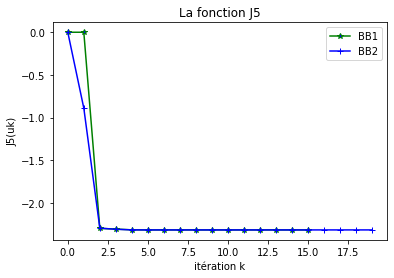

In [16]:
pho_0=0.1 #Pas initiale
histBB1,u_app1,k1 = BB1_Grad_spect(u_0,pho_0,Nmax,JG5)
histBB2 , u_app2, k2 = BB2_Grad_spect(u_0,pho_0,Nmax,JG5)
#k=max(k1,k2)
axe1=np.arange(0,k1)
axe2=np.arange(0,k2)

plt.plot(axe1,histBB1, color='green', marker='*',
     markerfacecolor='blue',label='BB1')
plt.plot(axe2,histBB2, color='b', marker='+',
     markerfacecolor='blue', label='BB2')
plt.xlabel("itération k")
plt.ylabel("J5(uk)")
plt.legend()
plt.title("La fonction J5")
#print(k1)
#print(k2)
print("Les valeures de la fonction dans chaque itération pour BB1:\n",histBB1)
print("Les valeures de la fonction dans chaque itération pour BB2:\n",histBB2)

### Traçant les courbes $J(u_k)$ en fonction de $k$ pour la fonction $J6$


Les valeures de la fonction dans chaque itération pour BB1:
 [ 1.53330000e+04  0.00000000e+00  4.23533398e+08  1.42214703e+08
  6.35136543e+07  2.35074800e+07  8.63276651e+06  2.95885301e+06
  1.00860320e+06  3.40355312e+05  1.14115559e+05  3.80860401e+04
  1.27737978e+04  4.27887271e+03  1.42343245e+03  4.75506881e+02
  1.62894820e+02  5.87099002e+01  2.28425175e+01  9.56934415e+00
  3.95031989e+00  8.03141139e-01 -2.91224493e+00  3.61281814e+01
 -2.01235311e+00 -3.16758178e+00 -4.13693878e+00 -4.38514277e+00
 -4.39065625e+00 -4.39287396e+00 -4.39291291e+00 -4.39291415e+00
 -4.39291421e+00 -4.39291422e+00 -4.39291422e+00 -4.39291422e+00
 -4.39291422e+00]
Les valeures de la fonction dans chaque itération pour BB2:
 [ 1.53330000e+04  8.28908190e+09  1.81362353e+08  1.12138277e+08
  3.62447598e+07  1.45310534e+07  5.00697529e+06  1.75053581e+06
  5.91883408e+05  2.00634085e+05  6.71558760e+04  2.25220635e+04
  7.58338823e+03  2.54061558e+03  8.46327301e+02  2.85408937e+02
  9.98282765e+0

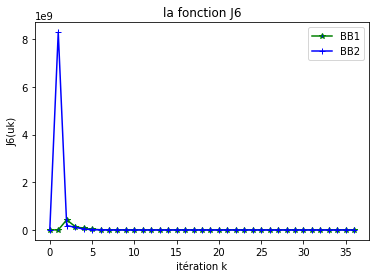

In [22]:
pho_0=0.1
histBB1,u_app1,k1=BB1_Grad_spect(u_0,pho_0,Nmax,JG6)
histBB2 , u_app2, k2=BB2_Grad_spect(u_0,pho_0,Nmax,JG6)

axe1=np.arange(0,k1)
axe2=np.arange(0,k2)

plt.plot(axe1,histBB1, color='green', marker='*',
     markerfacecolor='blue',label='BB1')
plt.plot(axe2,histBB2, color='b', marker='+',
     markerfacecolor='blue', label='BB2')
plt.xlabel("itération k")
plt.ylabel("J6(uk)")
plt.legend()
plt.title("la fonction J6")
print("Les valeures de la fonction dans chaque itération pour BB1:\n",histBB1)
print("Les valeures de la fonction dans chaque itération pour BB2:\n",histBB2)

### Traçant les courbes $J(u_k)$ en fonction de $k$ pour la fonction Rosenbrok

Text(0.5, 1.0, 'fonction de Rosenbrok ')

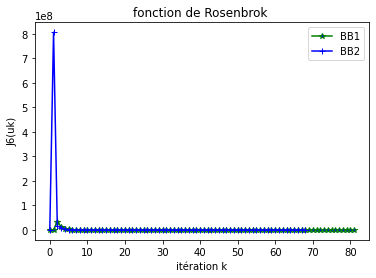

In [23]:
pho_0=0.1
u_0=np.arange(10)
histBB1,u_app1,k1 = BB1_Grad_spect(u_0,pho_0,Nmax,Res)
histBB2 , u_app2, k2 = BB2_Grad_spect(u_0,pho_0,Nmax,Res)
k=max(k1,k2)
axe1=np.arange(0,k1)
axe2=np.arange(0,k2)
plt.plot(axe1,histBB1, color='green', marker='*',
     markerfacecolor='blue',label='BB1')
plt.plot(axe2,histBB2, color='b', marker='+',
     markerfacecolor='blue', label='BB2')
plt.xlabel("itération k")
plt.ylabel("J6(uk)")
plt.legend()
plt.title("fonction de Rosenbrok ")